In [1]:
!which python

/Users/shubhang/Documents/Course/pgp-aiml-oct-21/FMT-Project/FMT-Project/venv/bin/python


In [2]:
!pip install numpy

You should consider upgrading via the '/Users/shubhang/Documents/Course/pgp-aiml-oct-21/FMT-Project/FMT-Project/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install matplotlib

You should consider upgrading via the '/Users/shubhang/Documents/Course/pgp-aiml-oct-21/FMT-Project/FMT-Project/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
from matplotlib import pyplot as plt
import numpy as np

#### Read all images and keep displaying them

In [5]:
story_img_1 = plt.imread('Experiment/1.jpeg')

In [6]:
type(story_img_1)

numpy.ndarray

In [7]:
story_img_1.shape

(300, 600, 3)

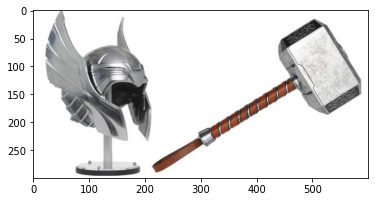

In [8]:
plt.imshow(story_img_1)

In [9]:
story_imgs = []

In [10]:
import glob

In [11]:
story_imgs = glob.glob('Experiment/*')

In [12]:
story_imgs

['Experiment/93.1.jpeg',
 'Experiment/1.jpeg',
 'Experiment/9.jpg',
 'Experiment/98.jpeg',
 'Experiment/94.jpeg',
 'Experiment/97.gif',
 'Experiment/6.jpeg',
 'Experiment/7.jpeg',
 'Experiment/99.jpeg',
 'Experiment/8.jpeg',
 'Experiment/4.jpeg',
 'Experiment/93.0.jpg',
 'Experiment/5.jpeg',
 'Experiment/95.jpg',
 'Experiment/2.jpeg',
 'Experiment/92.jpg',
 'Experiment/91.jpeg',
 'Experiment/3.jpeg']

In [13]:
story_img_arr = []

In [14]:
story_imgs.sort()

In [15]:
story_imgs

['Experiment/1.jpeg',
 'Experiment/2.jpeg',
 'Experiment/3.jpeg',
 'Experiment/4.jpeg',
 'Experiment/5.jpeg',
 'Experiment/6.jpeg',
 'Experiment/7.jpeg',
 'Experiment/8.jpeg',
 'Experiment/9.jpg',
 'Experiment/91.jpeg',
 'Experiment/92.jpg',
 'Experiment/93.0.jpg',
 'Experiment/93.1.jpeg',
 'Experiment/94.jpeg',
 'Experiment/95.jpg',
 'Experiment/97.gif',
 'Experiment/98.jpeg',
 'Experiment/99.jpeg']

In [16]:
len(story_imgs)

18

In [17]:
rows = 3
columns = 6
w = 10
h = 10

In [18]:
for idx, image_path in enumerate(story_imgs):
    img = plt.imread(image_path)
    story_img_arr.append(img)

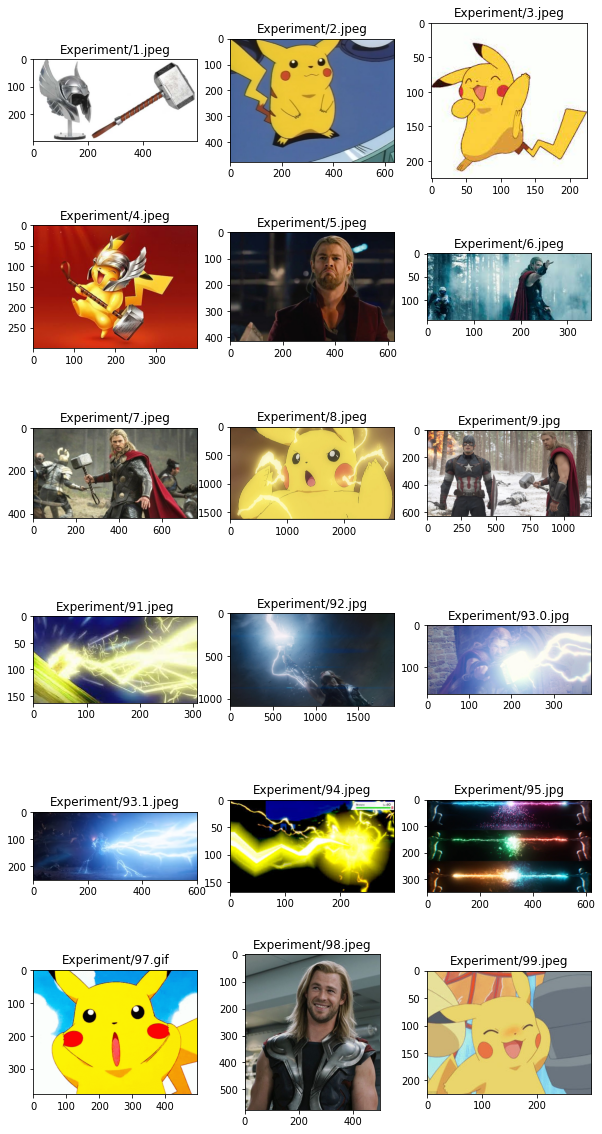

In [19]:
fig = plt.figure(figsize=(10, 20))
columns = 3
rows = 6
for i in range(1, columns*rows +1):
    img = story_img_arr[i-1]
    fig.add_subplot(rows, columns, i)
    plt.title(story_imgs[i-1])
    plt.imshow(img)
plt.show()

In [137]:
dialogues = [
    "Thor use to leave his hammer and helmet anywhere, he knows no one is worthy to pick up",
    "Ash's Pickachu notices it one day",
    "He had never seen such a fancy and shiny thing, and became happy",
    "Unknowingly he picked them up and started dancing",
    "Thor came to the place and didn't like that an unknown creature is worthy!!",
    "Give back my Mjolnir!! It's not a toy!",
    "Pickachu didn't like this and became angry",
    "Steve: Seems this strange creature is going to attack!",
    "Pickachu attacks with thunderbolt",
    "Thor: THANK YOU, SWEET RABBIT. I'm not in a gaming mood!!",
    "Thor: You’re spark is big. I’ve fought bigger.",
    "Both collides, Boom!!",
    "Pickachu teases with funny faces",
    "I like this small creature, he's brave and courageous",
    "Pickachu on hearing these compliments also gives up anger"
]

##### Looking at the above images seems we need to perform some cropping

#### Lets see the image 2

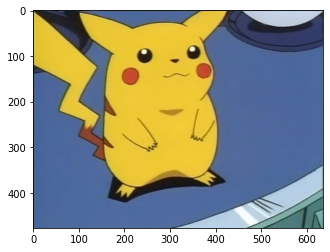

In [21]:
img2 = story_img_arr[1]
plt.imshow(img2)

In [22]:
img2.shape

(477, 636, 3)

In [23]:
def crop(arr, width_start, width_end, height_start, height_end):
    result = arr[height_start:height_end, width_start:width_end, :]
    return result

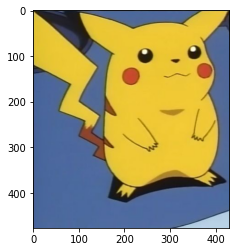

In [24]:
plt.imshow(crop(img2, 0, 430, 0, 477))

#### Observation seems our cropping is working as expected, lets check complex crop on one image

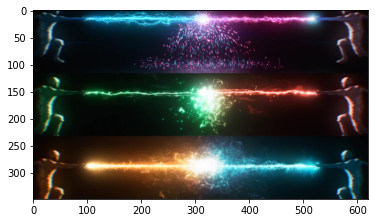

In [25]:
temp_img = story_img_arr[14]
plt.imshow(temp_img)

In [26]:
temp_img.shape

(349, 620, 3)

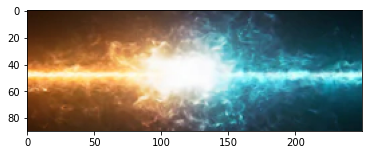

In [27]:
plt.imshow(crop(temp_img, 200, 450, 240, 330))

##### Lets create one text area function

In [28]:
def add_whitespace_area(arr, height, at_bottom=True, add_white = True):
    width = arr.shape[1]
    area = np.zeros(shape=(height, width, 3), dtype=int)
    white_space = 255-area if add_white else area
    return np.vstack((arr, white_space)) if at_bottom else np.vstack((white_space, arr))

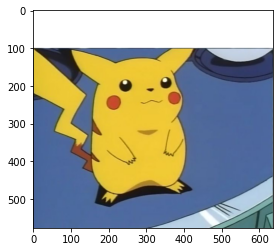

In [29]:
plt.imshow(add_whitespace_area(img2, 100, False))

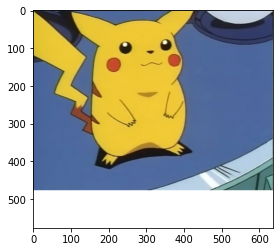

In [30]:
plt.imshow(add_whitespace_area(img2, 100))

##### Seems we are able to add the whitespace area below and above the images

In [31]:
from PIL import Image, ImageFont, ImageDraw

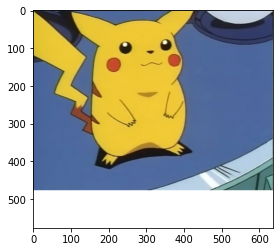

In [32]:
sample_img = add_whitespace_area(img2, 100)
plt.imshow(sample_img)

In [35]:
from matplotlib import cm
im = Image.fromarray(np.uint8(sample_img))

In [36]:
fontsize = 20
font = ImageFont.truetype(font='./twinkle-star/TwinkleStar-Regular.ttf', size=40)

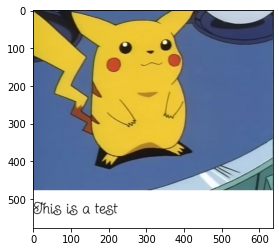

In [37]:
draw = ImageDraw.Draw(im)
draw.text((0,500), "This is a test", (0,0,0), font=font)
plt.imshow(im)

In [38]:
im.show()

In [39]:
draw.text?

In [40]:
def write_text(arr, width, height, text, font_size):
    changed_image = arr.copy()
    im = Image.fromarray(np.uint8(changed_image))
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype(font='./twinkle-star/TwinkleStar-Regular.ttf', size=font_size)
    draw.text((width,height), text, (0,0,0), font=font)
    return im

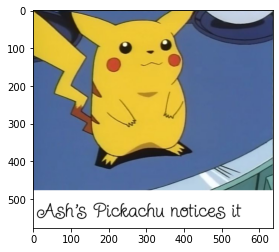

In [41]:
plt.imshow(write_text(sample_img, 10, 500, dialogues[1], 50))

In [42]:
dialogues[1]

"Ash's Pickachu notices it"

In [43]:
len(dialogues)

15

#### Let's check flipping of images

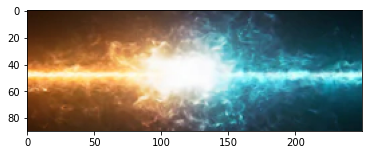

In [44]:
attack_middle = crop(temp_img, 200, 450, 240, 330)
plt.imshow(attack_middle)

In [45]:
attack_middle.shape

(90, 250, 3)

##### We have an inbuilt function

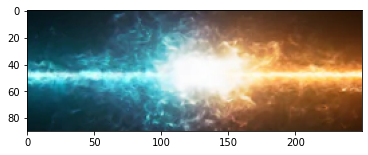

In [46]:
plt.imshow(np.fliplr(attack_middle))

#### But what is the fun in that??

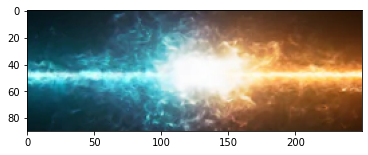

In [47]:
img_flip = attack_middle[:, ::-1 , :]
plt.imshow(img_flip)

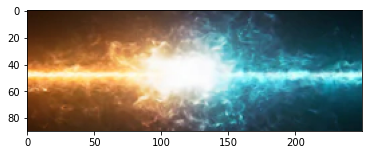

In [48]:
plt.imshow(attack_middle)

#### Seems we are able to flip in 1 line as well

In [49]:
def concatenate_images(array_images):
    return np.hstack(array_images)

In [51]:
story_img_arr[12].shape

(249, 602, 3)

In [52]:
img_flip.shape

(90, 250, 3)

In [53]:
story_img_arr[13].shape

(168, 299, 3)

In [54]:
merged_area = add_whitespace_area(add_whitespace_area(img_flip, 
                                                      79, 
                                                      add_white=False), 
                                  80, 
                                  at_bottom=False, 
                                  add_white=False)

In [55]:
merged_area.shape

(249, 250, 3)

In [56]:
right_area = add_whitespace_area(add_whitespace_area(story_img_arr[13], 
                                                      40, 
                                                      add_white=False), 
                                  41, 
                                  at_bottom=False, 
                                  add_white=False)

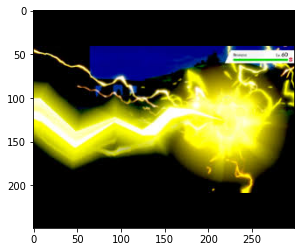

In [57]:
plt.imshow(right_area)

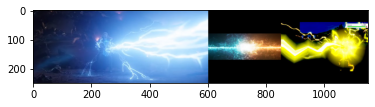

In [58]:
plt.imshow(concatenate_images([story_img_arr[12], merged_area, right_area]))

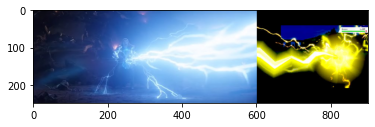

In [59]:
plt.imshow(concatenate_images([story_img_arr[12], right_area]))

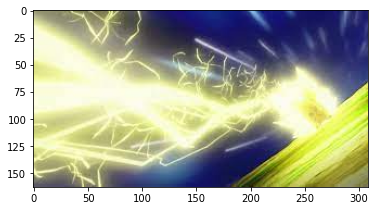

In [60]:
plt.imshow(np.fliplr(story_img_arr[9]))

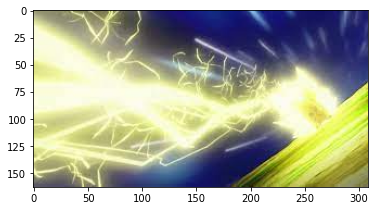

In [61]:
pick_attack = np.fliplr(story_img_arr[9])
plt.imshow(pick_attack)

In [62]:
pick_attack.shape

(163, 309, 3)

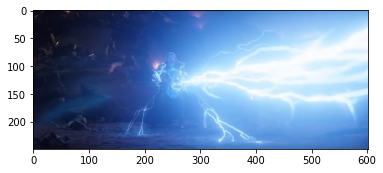

In [63]:
plt.imshow(story_img_arr[12])

In [64]:
story_img_arr[12].shape

(249, 602, 3)

In [65]:
right_area = add_whitespace_area(add_whitespace_area(pick_attack, 
                                                      43, 
                                                      add_white=False), 
                                  43, 
                                  at_bottom=False, 
                                  add_white=False)

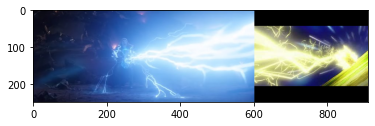

In [66]:
plt.imshow(concatenate_images([story_img_arr[12], right_area]))

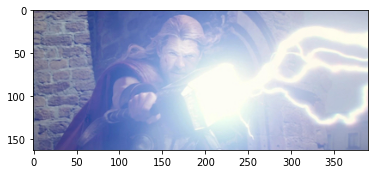

In [67]:
plt.imshow(story_img_arr[11])

In [68]:
story_img_arr[11].shape

(163, 390, 3)

In [85]:
height_start = 30
height_end = 193
width_start = 375
width_end = 600
middle_attack = crop(story_img_arr[12], width_start, width_end, height_start, height_end)

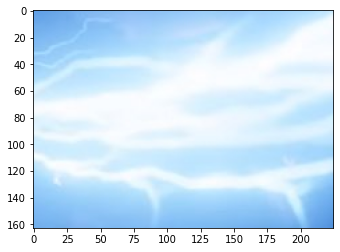

In [86]:
plt.imshow(middle_attack)

In [71]:
middle_attack.shape

(163, 220, 3)

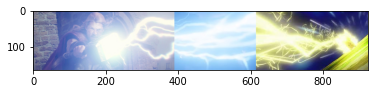

In [87]:
plt.imshow(concatenate_images([story_img_arr[11], middle_attack, pick_attack]))

In [88]:
both_attack = concatenate_images([story_img_arr[11], middle_attack, pick_attack])

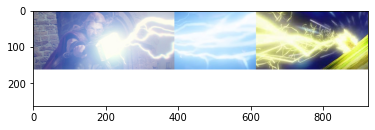

In [90]:
plt.imshow(add_whitespace_area(both_attack, 100))

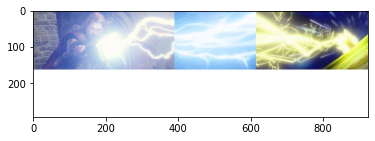

In [106]:
both_attack_with_caption = add_whitespace_area(both_attack, 130)
plt.imshow(both_attack_with_caption)

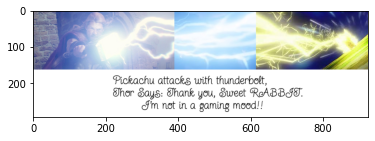

In [111]:
plt.imshow(write_text(both_attack_with_caption, 
                      0, 140, 
                      """
                      Pickachu attacks with thunderbolt, 
                      Thor Says: Thank you, Sweet RABBIT. 
                              I'm not in a gaming mood!!"""
                      , 30))

In [92]:
dialogues

['Thor use to leave his hammer and helmet anywhere, he knows no one is worthy to pick up',
 "Ash's Pickachu notices it",
 'He had never seen such a fancy and shiny thing, and became happy',
 'Unknowingly he picked them up and started dancing',
 "Thor came to the place and didn't like that an unknown creature is worthy!!",
 "Give back my Mjolnir!! It's not a toy!",
 "Pickachu didn't like this and became angry",
 'Steve: Seems this strange creature is going to attack!',
 'Pickachu attacks with thunderbolt',
 "Thor: THANK YOU, SWEET RABBIT. I'm not in a gaming mood!!",
 'Thor: You’re spark is big. I’ve fought bigger.',
 'Both collides, Boom!!',
 'Pickachu teases with funny faces',
 "I like this small creature, he's brave and courageous",
 'Pickachu on hearing these compliments also gives up anger']

In [112]:
attack_scene = write_text(both_attack_with_caption, 
                      0, 140, 
                      """
                      Pickachu attacks with thunderbolt, 
                      Thor Says: Thank you, Sweet RABBIT. 
                              I'm not in a gaming mood!!"""
                      , 30)

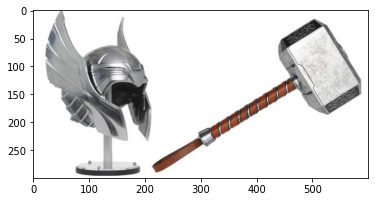

In [119]:
plt.imshow(story_img_arr[0])

In [114]:
story_img_arr[0].shape

(300, 600, 3)

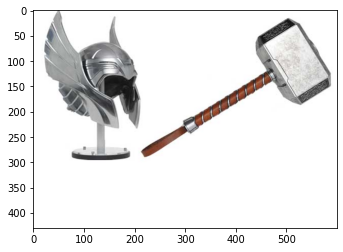

In [134]:
scene_1 = add_whitespace_area(story_img_arr[0], 130)
plt.imshow(scene_1)

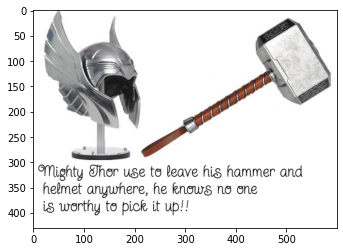

In [135]:
scene_1 = write_text(scene_1, 
                      10, 300, 
                      """Mighty Thor use to leave his hammer and 
 helmet anywhere, he knows no one 
 is worthy to pick it up!!
                      """
                      , 30)
plt.imshow(scene_1)

In [148]:
scene_1.save("out/scene1.jpg")

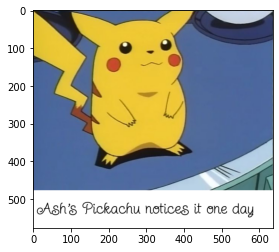

In [139]:
plt.imshow(write_text(sample_img, 10, 500, dialogues[1], 40))

In [150]:
scene_2 = write_text(sample_img, 10, 500, dialogues[1], 40)

In [151]:
scene_2.save('out/scene_2.jpg')

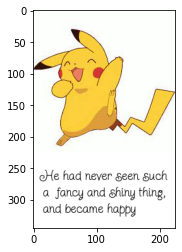

In [162]:
scene_3 = add_whitespace_area(story_img_arr[2], 120)
scene_3 = write_text(scene_3, 
                      10, 250, 
                      """He had never seen such 
 a  fancy and shiny thing, 
 and became happy"""
                      , 20)
plt.imshow(scene_3)

In [163]:
scene_3.save('out/scene_3.jpg')

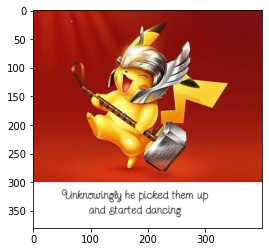

In [173]:
scene_4 = add_whitespace_area(story_img_arr[3], 80)
scene_4 = write_text(scene_4, 
                      50, 310, 
                      """Unknowingly he picked them up 
        and started dancing"""
                      , 20)
plt.imshow(scene_4)

In [174]:
scene_4.save('out/scene4.jpg')

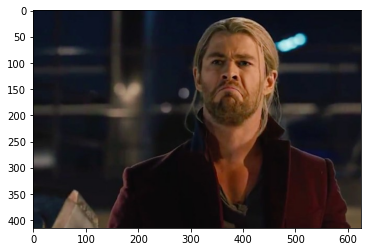

In [175]:
plt.imshow(story_img_arr[4])

In [176]:
story_img_arr[4].shape

(415, 625, 3)

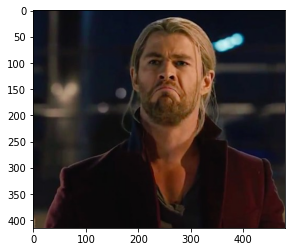

In [177]:
plt.imshow(crop(story_img_arr[4], 120, 600, 0, 415))

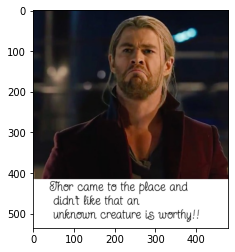

In [186]:
scene_5 = crop(story_img_arr[4], 120, 600, 0, 415)
scene_5 = add_whitespace_area(scene_5, 120)
scene_5 = write_text(scene_5, 
                      40, 415, 
                      """Thor came to the place and 
 didn't like that an 
 unknown creature is worthy!!"""
                      , 30)
plt.imshow(scene_5)
scene_5.save('out/scene5.jpg')

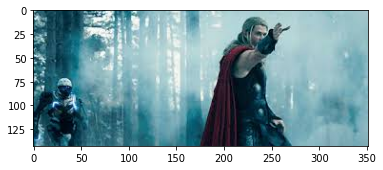

In [187]:
plt.imshow(story_img_arr[5])

In [188]:
story_img_arr[5].shape

(143, 352, 3)

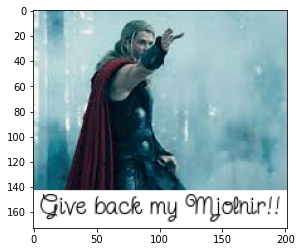

In [219]:
scene_6 = crop(story_img_arr[5], 150, 370, 0, 143)
scene_6 = add_whitespace_area(scene_6, 30)
scene_6 = write_text(scene_6, 
                      5, 143, 
                      """Give back my Mjolnir!!"""
                      , 20)
plt.imshow(scene_6)
scene_6.save('out/scene6.jpg')

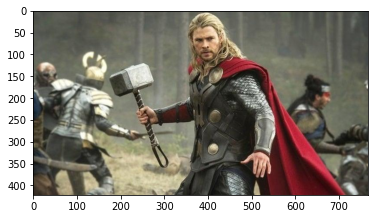

In [209]:
plt.imshow(story_img_arr[6])

In [212]:
story_img_arr[6].shape

(422, 767, 3)

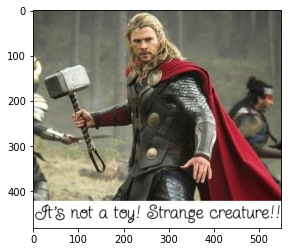

In [220]:
scene_7 = crop(story_img_arr[6], 150, 700, 0, 422)
scene_7 = add_whitespace_area(scene_7, 60)
scene_7 = write_text(scene_7, 
                      5, 422, 
                      """It's not a toy! Strange creature!!"""
                      , 40)
plt.imshow(scene_7)
scene_7.save('out/scene7.jpg')

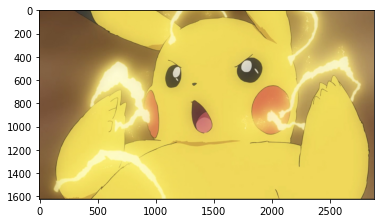

In [221]:
plt.imshow(story_img_arr[7])

In [222]:
story_img_arr[7].shape

(1622, 2880, 3)

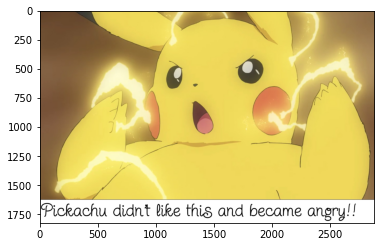

In [231]:
scene_8 = add_whitespace_area(story_img_arr[7], 200)
scene_8 = write_text(scene_8, 
                      5, 1622, 
                      """Pickachu didn't like this and became angry!!"""
                      , 150)
plt.imshow(scene_8)
scene_8.save('out/scene_8.jpg')

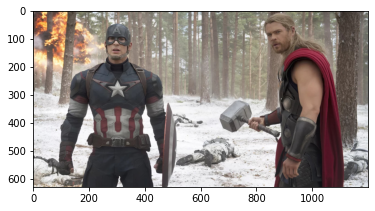

In [232]:
plt.imshow(story_img_arr[8])

In [233]:
story_img_arr[8].shape

(630, 1200, 3)

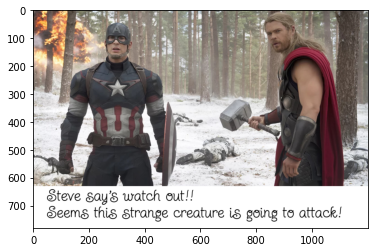

In [240]:
scene_9 = add_whitespace_area(story_img_arr[8], 150)
scene_9 = write_text(scene_9, 
                      50, 630, 
                      """Steve say's watch out!!
Seems this strange creature is going to attack!"""
                      , 55)
plt.imshow(scene_9)
scene_9.save('out/scene_9.jpg')

In [ ]:
# Run back home, little princess.
# "I've got this completely under control!"

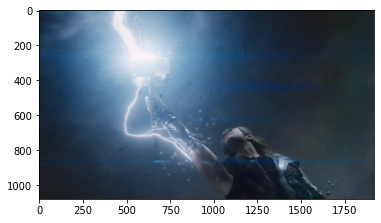

In [243]:
plt.imshow(story_img_arr[10])

In [245]:
story_img_arr[10].shape

(1080, 1920, 3)

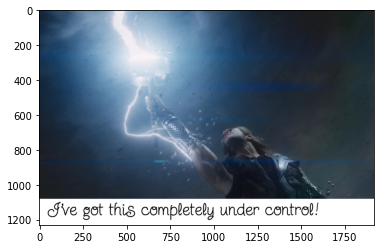

In [248]:
scene_10 = add_whitespace_area(story_img_arr[10], 150)
scene_10 = write_text(scene_10, 
                      50, 1080, 
                      """I've got this completely under control!"""
                      , 100)
plt.imshow(scene_10)
scene_10.save('out/scene10.jpg')

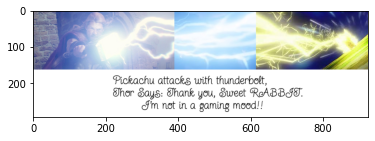

In [249]:
plt.imshow(attack_scene)

In [290]:
attack_scene.save('out/scene11.jpg')

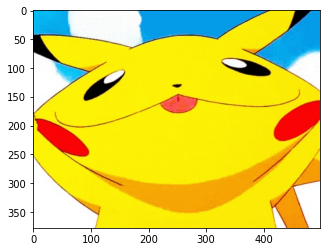

In [261]:
pickachu_teasing1 = plt.imread('Experiment/97.1.jpg')
plt.imshow(pickachu_teasing1)

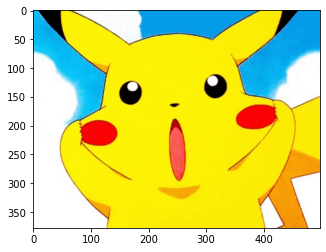

In [262]:
pickachu_teasing2 = plt.imread('Experiment/97.2.jpg')
plt.imshow(pickachu_teasing2)

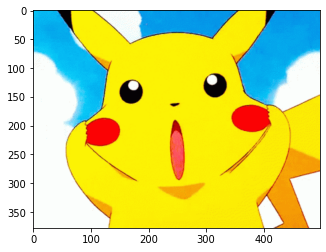

In [251]:
plt.imshow(story_img_arr[15])

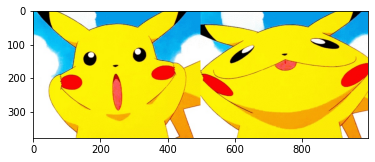

In [263]:
pickachu_after_attack = np.hstack([pickachu_teasing2, pickachu_teasing1])
plt.imshow(pickachu_after_attack)

In [264]:
pickachu_after_attack.shape

(378, 996, 3)

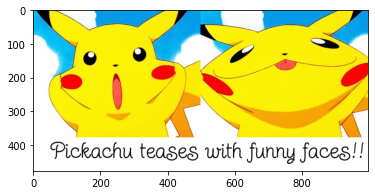

In [273]:
scene_12 = add_whitespace_area(pickachu_after_attack, 100)
scene_12 = write_text(scene_12, 
                      50, 378, 
                      """Pickachu teases with funny faces!!"""
                      , 65)
plt.imshow(scene_12)
scene_12.save('out/scene12.jpg')

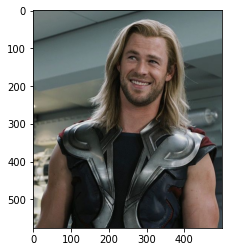

In [275]:
plt.imshow(story_img_arr[-2])

In [277]:
story_img_arr[-2].shape

(576, 500, 3)

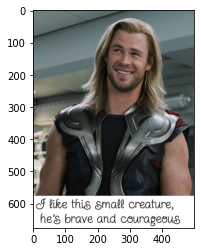

In [281]:
scene_13 = add_whitespace_area(story_img_arr[-2], 100)
scene_13 = write_text(scene_13, 
                      10, 576, 
                      """I like this small creature, 
 he's brave and courageous"""
                      , 40)
plt.imshow(scene_13)
scene_13.save('out/scene13.jpg')

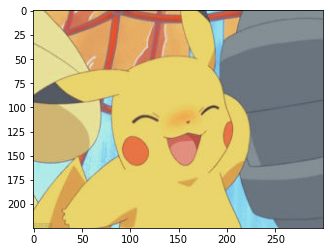

In [282]:
plt.imshow(story_img_arr[-1])

In [283]:
story_img_arr[-1].shape

(225, 300, 3)

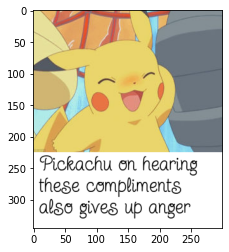

In [289]:
scene_14 = add_whitespace_area(story_img_arr[-1], 120)
scene_14 = write_text(scene_14, 
                      10, 225, 
                      """Pickachu on hearing 
these compliments 
also gives up anger"""
                      , 30)
plt.imshow(scene_14)
scene_14.save('out/scene_14.jpg')

In [252]:
story_img_arr[15].shape

(378, 498, 4)

#### Now Let's resize into same size

In [295]:
all_outputs = glob.glob('out/*')

In [296]:
all_outputs.sort()

In [297]:
all_outputs

['out/1.jpg',
 'out/2.jpg',
 'out/3.jpg',
 'out/4.jpg',
 'out/5.jpg',
 'out/6.jpg',
 'out/7.jpg',
 'out/8.jpg',
 'out/9.jpg',
 'out/91.jpg',
 'out/92.jpg',
 'out/93.jpg',
 'out/94.jpg',
 'out/95.jpg']

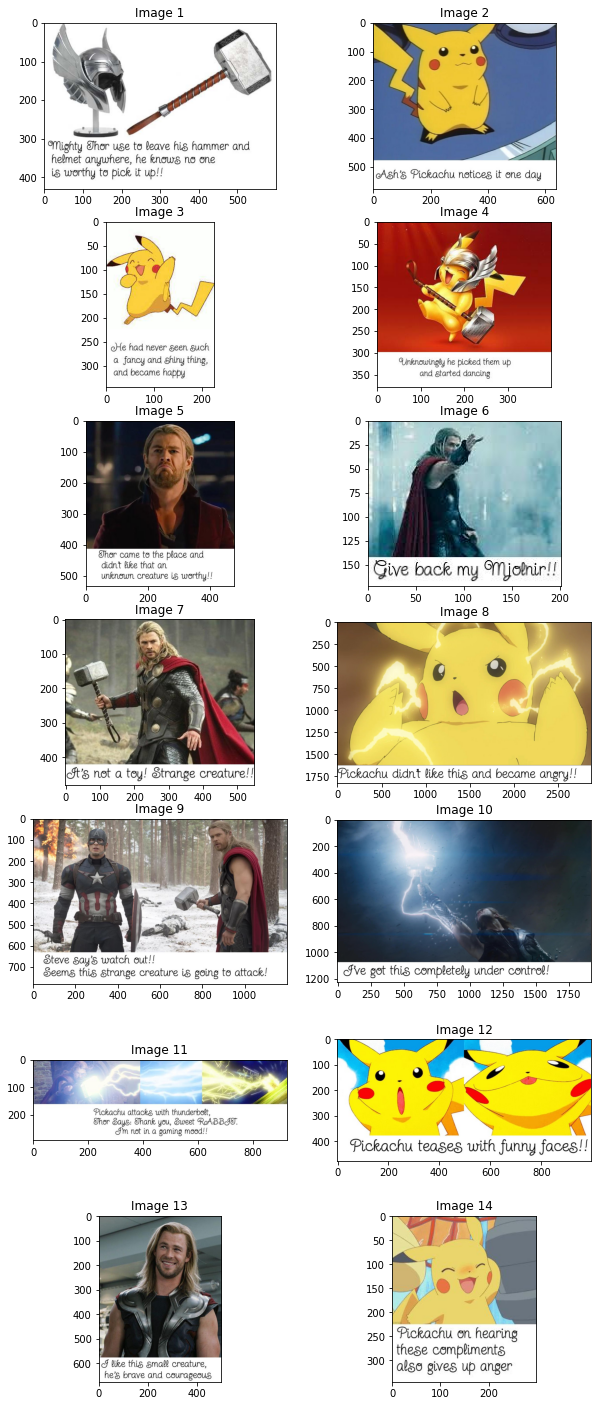

In [317]:
fig = plt.figure(figsize=(10, 25))
columns = 2
rows = 7
for i in range(1, columns*rows +1):
    output_image = plt.imread(all_outputs[i-1])
    img = output_image
    fig.add_subplot(rows, columns, i)
    plt.title(f'Image {i}')
    plt.imshow(img)
fig1 = plt.gcf()
plt.show()

In [319]:
plt.draw()
fig1.savefig('foo.jpg', dpi=100)

<Figure size 432x288 with 0 Axes>